In [1]:
import os
import matplotlib.image as img 
import numpy as np 
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# import pickle

%matplotlib inline

In [2]:
def process_data(folder): 
    gender = "";                                
    images = []; 
    dfs = pd.read_excel("./data/adultFaces/full_att_scores/demographics/demographic-others-labels.xlsx", sheet_name="Final Values")
    for subdir, dirs, files in os.walk(folder):
        for f in files:
            d = {};
            img = cv2.imread(os.path.join(subdir,f))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img/255.0, (256, 256))
                for n, race in zip(dfs["Filename"], dfs["Race"]):
                    if(n == f):
                        if(race == 0):
                            d["race"] = "other"
                        elif(race == 1):
                            d["race"] = "white"
                        elif(race == 2):
                            d["race"] = "black"
                        elif(race == 3):
                            d["race"] = "east asian"
                        elif(race == 4):
                            d["race"] = "south asian"
                        elif(race == 5):
                            d["race"] = "hispanic"
                        else:
                            d["race"] = "middle eastern"
                            
                        d["name"] = f
                        d["image"] = img
                        images.append(d)
    return images


path = "./data/adultFaces/faceImages"
img_info = process_data(path)

In [3]:
print(len(img_info))
# print(img_info[:20])

2222


In [4]:
counter = 0;
for i in img_info:
    if i["race"] == "middle eastern":
        counter += 1
print(counter)

print(len(img_info)/2)
print(img_info[0]["image"].shape)

24
1111.0
(256, 256, 3)


In [5]:
labels = ["other", "white", "black", "east asian", "south asian", "hispanic", "middle eastern"]
images = []
all_labels = []
for info in img_info:
    images.append(info["image"])
    all_labels.append(labels.index(info["race"]))
images = np.array(images)
all_labels = np.array(all_labels)
all_labels = all_labels.reshape(2222, 1)

In [6]:
image_smote = images.reshape(2222, 256*256*3)
# print(images.shape)
# print(all_labels.shape)

In [8]:
sm = SMOTE(k_neighbors = 1)

In [9]:
image_smote, label_smote = sm.fit_resample(image_smote, all_labels)

In [10]:
print(image_smote.shape)
label_smote = label_smote.reshape(12852, 1)

(12852, 196608)


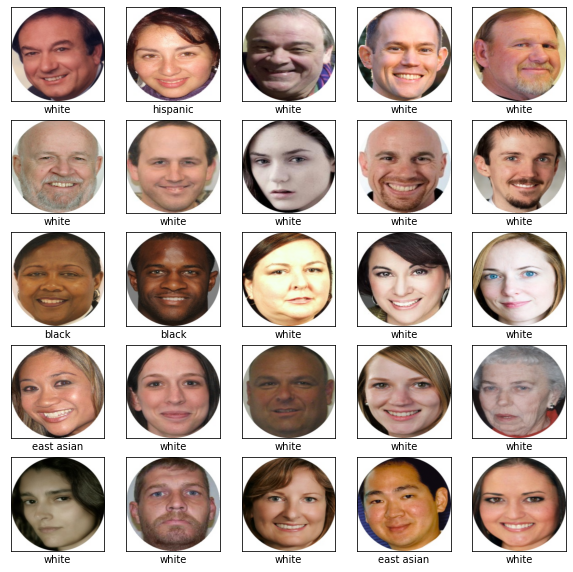

In [11]:
image2 = image_smote.reshape(12852, 256, 256, 3)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image2[i], cmap=plt.cm.binary)
    plt.xlabel(labels[label_smote[i][0]])
plt.show()

In [12]:
train_images, test_images, train_labels, test_labels = train_test_split(image_smote, label_smote, train_size=0.5,test_size=0.5, stratify=label_smote)

In [ ]:
# train_smote = train_images.reshape(1111, 256*256*3)
# image_smote, label_smote = sm.fit_resample(train_smote, train_labels)


In [13]:
from collections import Counter
count = []
print(train_images.shape)
for t in train_labels:
    count.append(t[0])
print(Counter(count))
train_images = train_images.reshape(6426, 256, 256, 3)
train_labels = train_labels.reshape(6426, 1)
test_images = test_images.reshape(6426, 256, 256, 3)
test_labels = test_labels.reshape(6426, 1)

(6426, 196608)
Counter({2: 918, 5: 918, 1: 918, 6: 918, 4: 918, 3: 918, 0: 918})


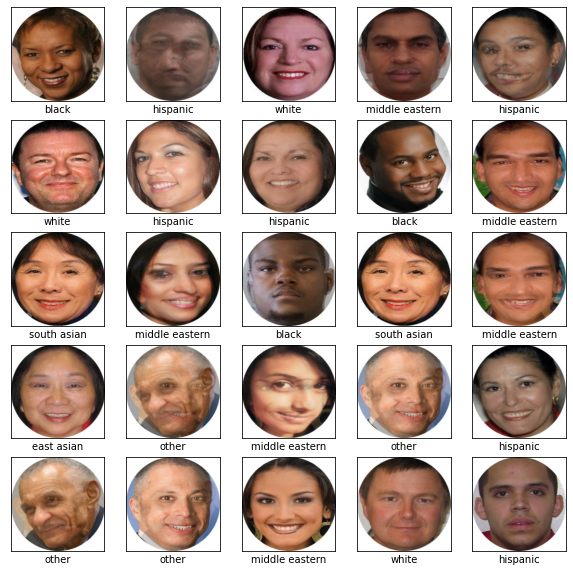

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i][0]])
plt.show()

In [15]:
model = models.Sequential()
# model.fit(train_images, train_labels, test_images, test_labels)
model.add(layers.Conv2D(96, (11, 11), activation='relu', input_shape=(256, 256, 3), strides=(4, 4)))
model.add(layers.MaxPooling2D((3, 3), strides=(2, 2)))
model.add(layers.Conv2D(256, (5, 5), activation='relu', padding = 'same'))
model.add(layers.MaxPooling2D((3, 3), strides=(2,2)))
model.add(layers.Conv2D(384, (3, 3), activation='relu', padding ='same'))
model.add(layers.Conv2D(384, (3, 3), activation='relu', padding ='same'))
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding ='same'))
model.add(layers.MaxPooling2D((3, 3), strides=(2,2)))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)       8

In [17]:
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dense(7))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 256)       8

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
201/201 [==============================] - 421s 2s/step - loss: 2.0609 - accuracy: 0.1408 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 2/10
201/201 [==============================] - 336s 2s/step - loss: 1.9463 - accuracy: 0.1396 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 3/10
201/201 [==============================] - 313s 2s/step - loss: 1.9461 - accuracy: 0.1363 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 4/10
201/201 [==============================] - 295s 1s/step - loss: 1.9462 - accuracy: 0.1323 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 5/10
201/201 [==============================] - 310s 2s/step - loss: 1.9462 - accuracy: 0.1391 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 6/10
201/201 [==============================] - 292s 1s/step - loss: 1.9461 - accuracy: 0.1369 - val_loss: 1.9459 - val_accuracy: 0.1429
Epoch 7/10
201/201 [==============================] - 301s 1s/step - loss: 1.9461 - accuracy: 0.1349 - val_loss: 1.9459 - val_accuracy: 0.1429

In [ ]:
model.save('models/race.h5')

201/201 - 63s - loss: 1.9459 - accuracy: 0.1429


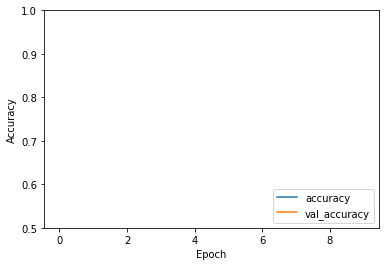

In [20]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [21]:
print(test_acc)

0.1428571492433548


In [30]:
from keract import get_activations, display_activations, display_heatmaps
keract_inputs = test_images[6:7]
# keract_targets = test_labels[:1]
activations = get_activations(model, keract_inputs)

conv2d_input (1, 256, 256, 3) 


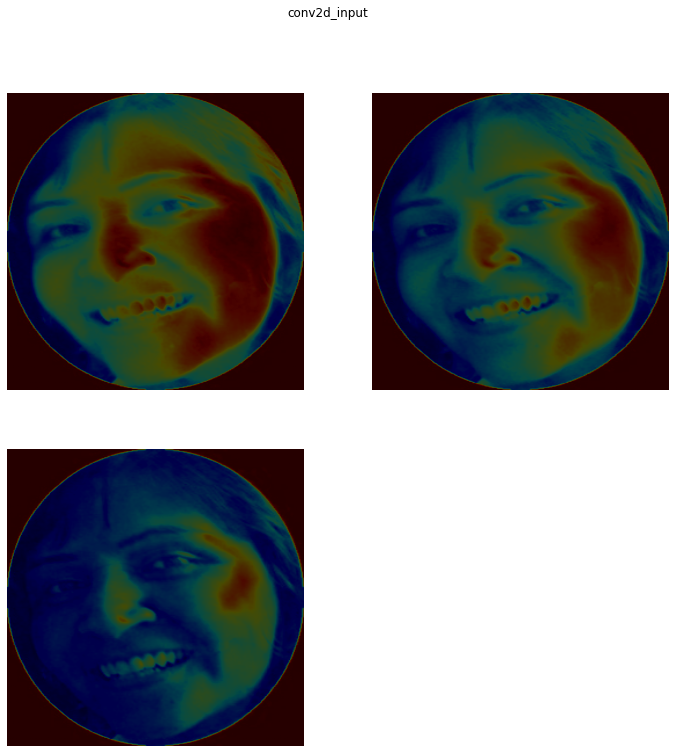

conv2d (1, 62, 62, 96) 


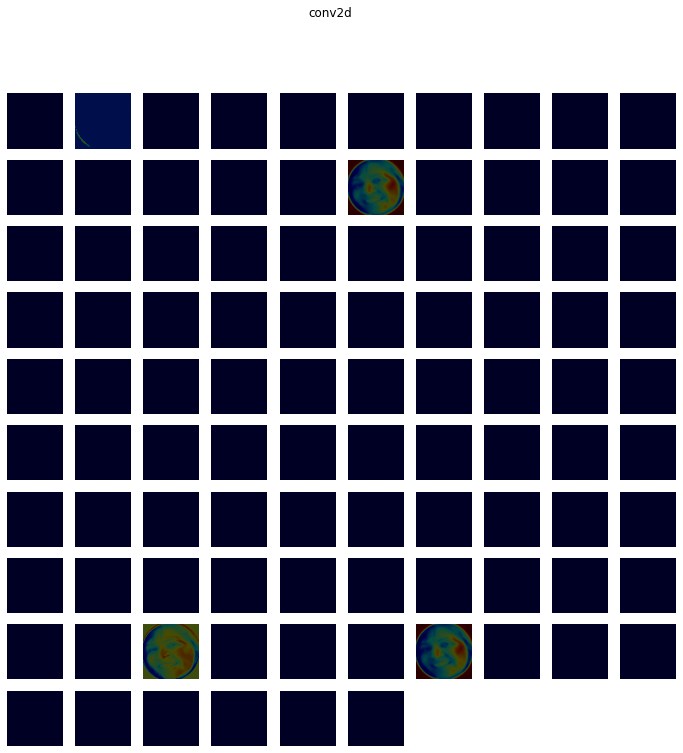

max_pooling2d (1, 30, 30, 96) 


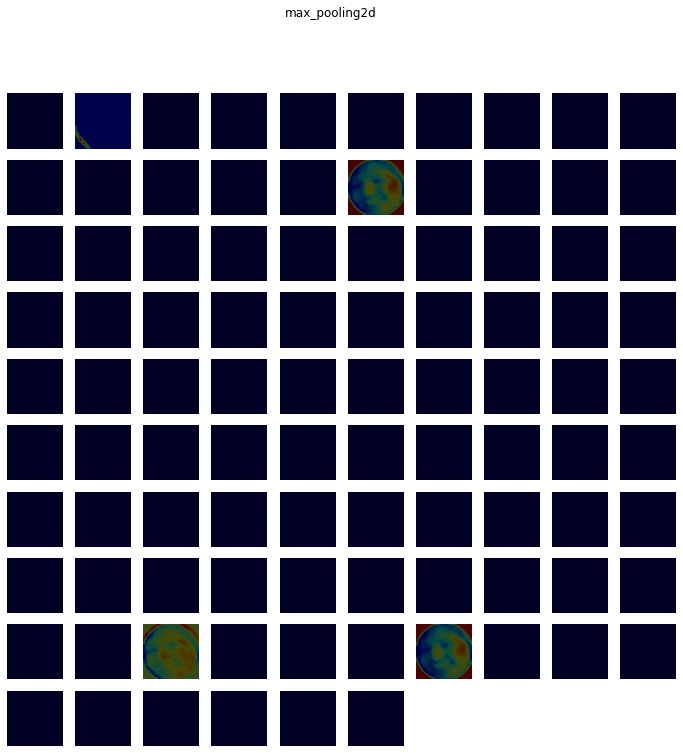

conv2d_1 (1, 30, 30, 256) 


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ff578c49550> (for post_execute):


KeyboardInterrupt: 

In [31]:
display_heatmaps(activations, keract_inputs, save=False)